In [34]:
import yfinance as yfi
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
from matplotlib import style

Just copied pytrends example from github... pretty simple

Set up the trend request object

Keywords in a dictionary, could add some more to this and accumulate the returned data together

set up the yahoo finance ticker object

In [51]:
style.use('fivethirtyeight')
pytrend = TrendReq()
pytrend.build_payload(
    kw_list=['Moissanite'])
    # Tried changing timeframe per pytrend docs, but google returns an errror every time.
    # Stuck with default timeframe of 5 years
CTHR= yfi.Ticker('CTHR')
mois_iot = pytrend.interest_over_time()
CTHR_5y=CTHR.history(period='5y',interval='1wk')


Merge the two dataframes, makes plotting easier


trends week ends on Sunday, finance week is monday, so shift all the trends date back one so they line up.

In [52]:
shifted_mois_iot=mois_iot.shift(1,freq='D')
CTHRvsMois = pd.concat([CTHR_5y,shifted_mois_iot],axis=1)
CTHRvsMois.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moissanite,isPartial
2020-11-30,1.23,1.2900,1.15,1.23,1029200,0,0,68.0,False
2020-12-07,1.22,1.3300,1.18,1.31,837500,0,0,56.0,False
2020-12-14,1.32,1.3600,1.28,1.30,692500,0,0,53.0,False
2020-12-21,1.27,1.3300,1.27,1.32,410900,0,0,70.0,False
2020-12-28,1.34,1.3600,1.22,1.23,810300,0,0,71.0,False
2021-01-04,1.25,1.3700,1.22,1.34,1097100,0,0,68.0,False
2021-01-11,1.30,1.3700,1.30,1.35,622500,0,0,64.0,False
2021-01-18,1.37,1.4500,1.30,1.44,912000,0,0,58.0,False
2021-01-25,1.43,1.8400,1.42,1.73,2729300,0,0,70.0,True
2021-01-29,1.69,1.8429,1.65,1.73,835318,0,0,NaN,NaN


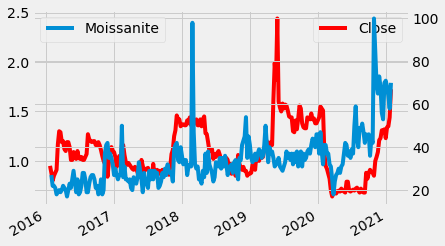

In [57]:
ax1 = CTHRvsMois.plot(y=['Close'],color='red')
ax2=ax1.twinx()
CTHRvsMois.plot(ax=ax2,y=['Moissanite'])

plt.show()